### 2. **Gráficos para Visualización de Datos**
**Resumen:** La visualización de datos es clave para identificar patrones y relaciones entre diferentes variables. Los gráficos apropiados pueden proporcionar información valiosa sobre el comportamiento de los precios y volúmenes de ventas.

In [18]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import utils.MAGic_Avocado_utils as magic

In [2]:
# Carga el dataset
df = pd.read_csv("./dataset/avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
regiones = df['region'].unique().tolist()
regiones    
# for r in regiones:
#     print(r)
# GreatLakes: Minnesota, Wisconsin, Illinois, Indiana, Michigan, Ohio, Pennsylvania, and New York
# Midsouth: Tennessee, Mississippi, Arkansas, Missouri, and Kentucky
# Northeast:  Connecticut, Maine, Massachusetts, New Hampshire, Rhode Island, and Vermont. Plus New Jersey, New York and Pennsylvania.
# Plains:
# SouthCentral:
# Southeast:
# West:

['Albany',
 'Atlanta',
 'BaltimoreWashington',
 'Boise',
 'Boston',
 'BuffaloRochester',
 'California',
 'Charlotte',
 'Chicago',
 'CincinnatiDayton',
 'Columbus',
 'DallasFtWorth',
 'Denver',
 'Detroit',
 'GrandRapids',
 'GreatLakes',
 'HarrisburgScranton',
 'HartfordSpringfield',
 'Houston',
 'Indianapolis',
 'Jacksonville',
 'LasVegas',
 'LosAngeles',
 'Louisville',
 'MiamiFtLauderdale',
 'Midsouth',
 'Nashville',
 'NewOrleansMobile',
 'NewYork',
 'Northeast',
 'NorthernNewEngland',
 'Orlando',
 'Philadelphia',
 'PhoenixTucson',
 'Pittsburgh',
 'Plains',
 'Portland',
 'RaleighGreensboro',
 'RichmondNorfolk',
 'Roanoke',
 'Sacramento',
 'SanDiego',
 'SanFrancisco',
 'Seattle',
 'SouthCarolina',
 'SouthCentral',
 'Southeast',
 'Spokane',
 'StLouis',
 'Syracuse',
 'Tampa',
 'TotalUS',
 'West',
 'WestTexNewMexico']

In [4]:
lst_regions = ['GreatLakes','Midsouth','Northeast','Plains','SouthCentral','Southeast','West']
len(lst_regions)

7

1. **Gráfico de Violín de Volumen de Ventas por Región:**
   - **Uso de Datos:** Usa las columnas `Total Volume` y `region`.
   - **Esperado:** Visualiza la distribución de ventas en diferentes regiones.
     - Utiliza la función `violinplot` de `seaborn` para crear gráficos de violín.
     - Configura los ejes para mostrar la relación entre `Total Volume` y `region`.
     - Añade etiquetas y títulos usando `plt.title()` y `plt.xlabel()` para facilitar la interpretación.

In [20]:
# Añade columna con categorización de City/Region/GreaterRegion/TotalUS
df['cat_region'] = df['region'].transform(lambda x: magic.get_truly_region(x))
# Prepara filtro de filas para tener en cuenta sólo verdaderamente GreaterRegion
greater_regions = df[df['cat_region']=='GreaterRegion']

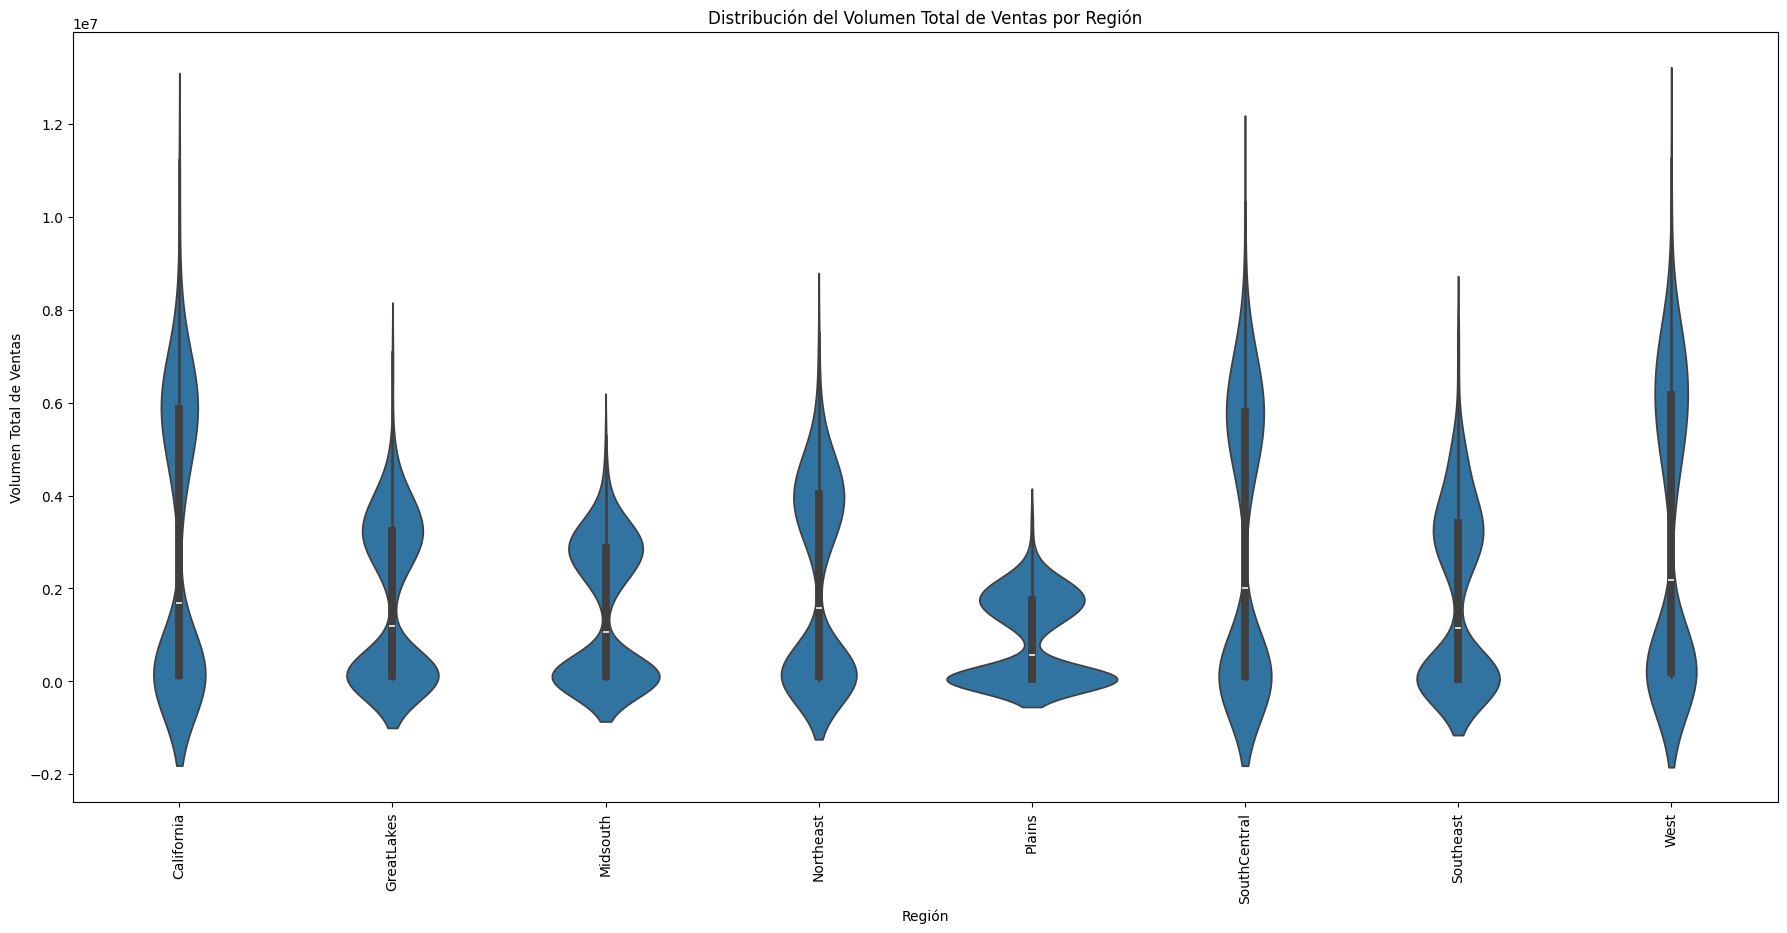

In [ ]:
plt.figure(figsize=(22, 10))  
# Configura el tamaño del gráfico para mejor visibilidad  

# Crear el gráfico de violín para las GreaterRegions 

sns.violinplot(x='region', y='Total Volume', data=greater_regions)  
# Configurar el título y las etiquetas 
plt.title('Distribución del Volumen Total de Ventas por Región') 
plt.xlabel('Región') 
plt.ylabel('Volumen Total de Ventas')  
# Mostrar el gráfico 
plt.xticks(rotation=90)  # Rota las etiquetas del eje x si son muchas o largas 
plt.show()

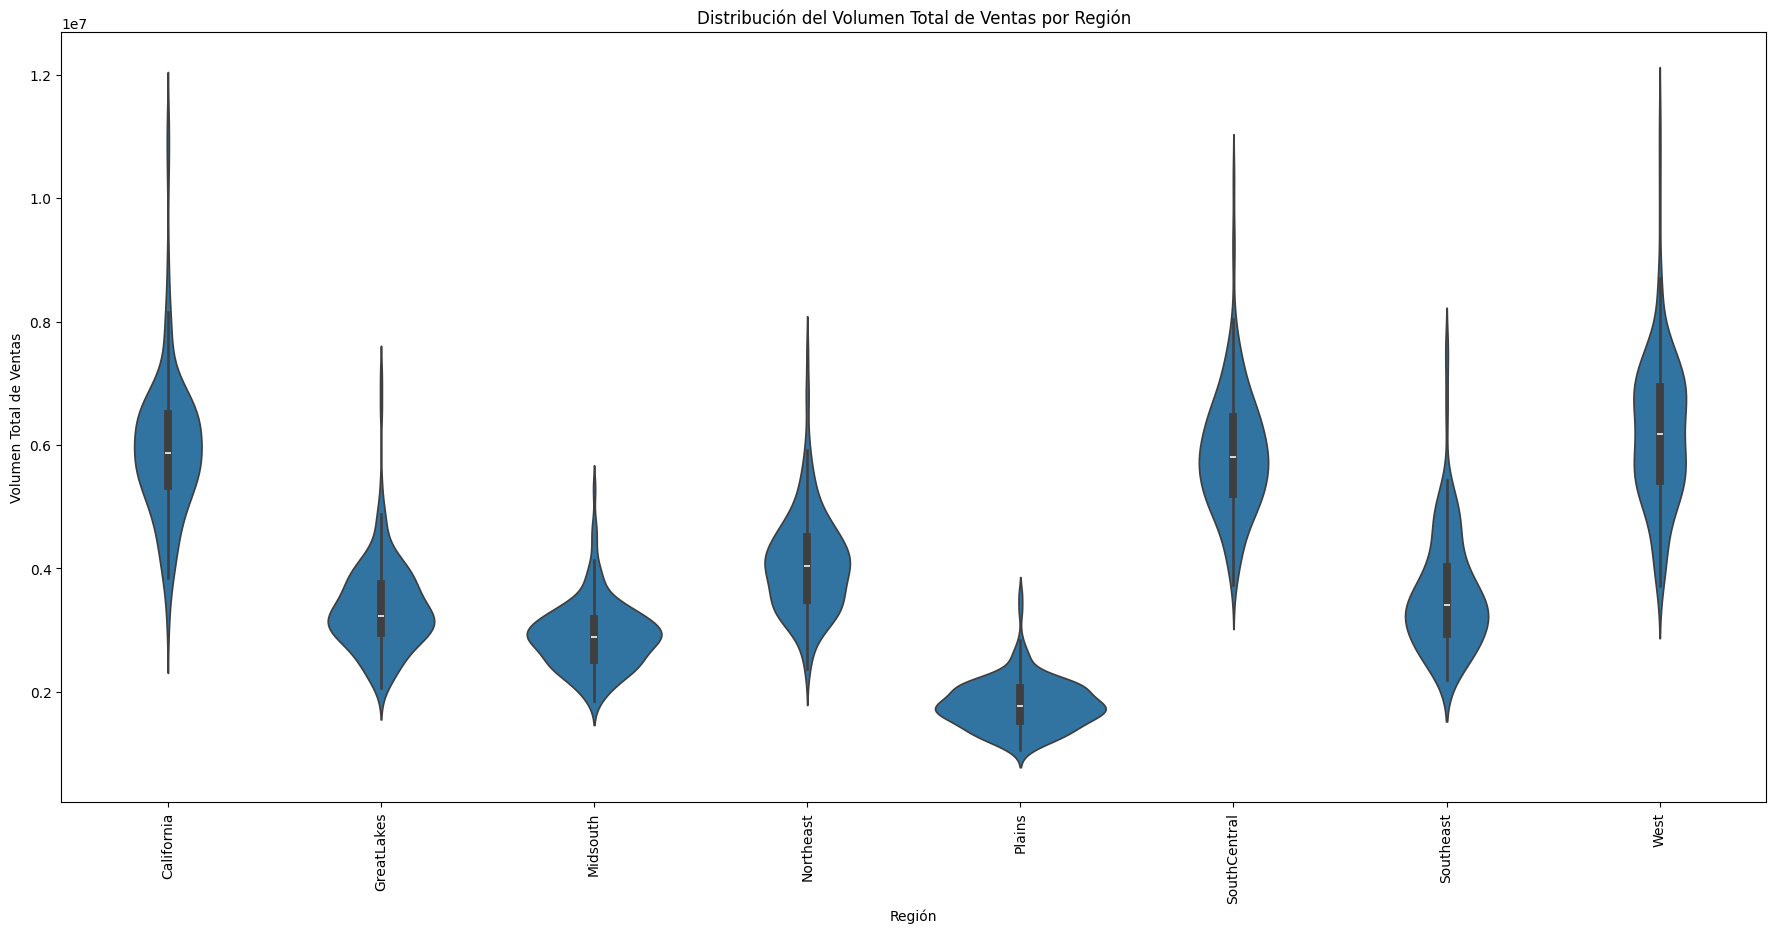

In [ ]:
#Vamos a hacer lo mismo pero ahora solo contemplando los aguacates normales (descartamos los orgánicos)

normal_greater_regions = greater_regions[greater_regions['type'] == 'conventional']
plt.figure(figsize=(22, 10))  
# Configura el tamaño del gráfico para mejor visibilidad  

# Crear el gráfico de violín para las GreaterRegions 

sns.violinplot(x='region', y='Total Volume', data=normal_greater_regions)  
# Configurar el título y las etiquetas 
plt.title('Distribución del Volumen Total de Ventas por Región') 
plt.xlabel('Región') 
plt.ylabel('Volumen Total de Ventas')  
# Mostrar el gráfico 
plt.xticks(rotation=90)  # Rota las etiquetas del eje x si son muchas o largas 
plt.show()

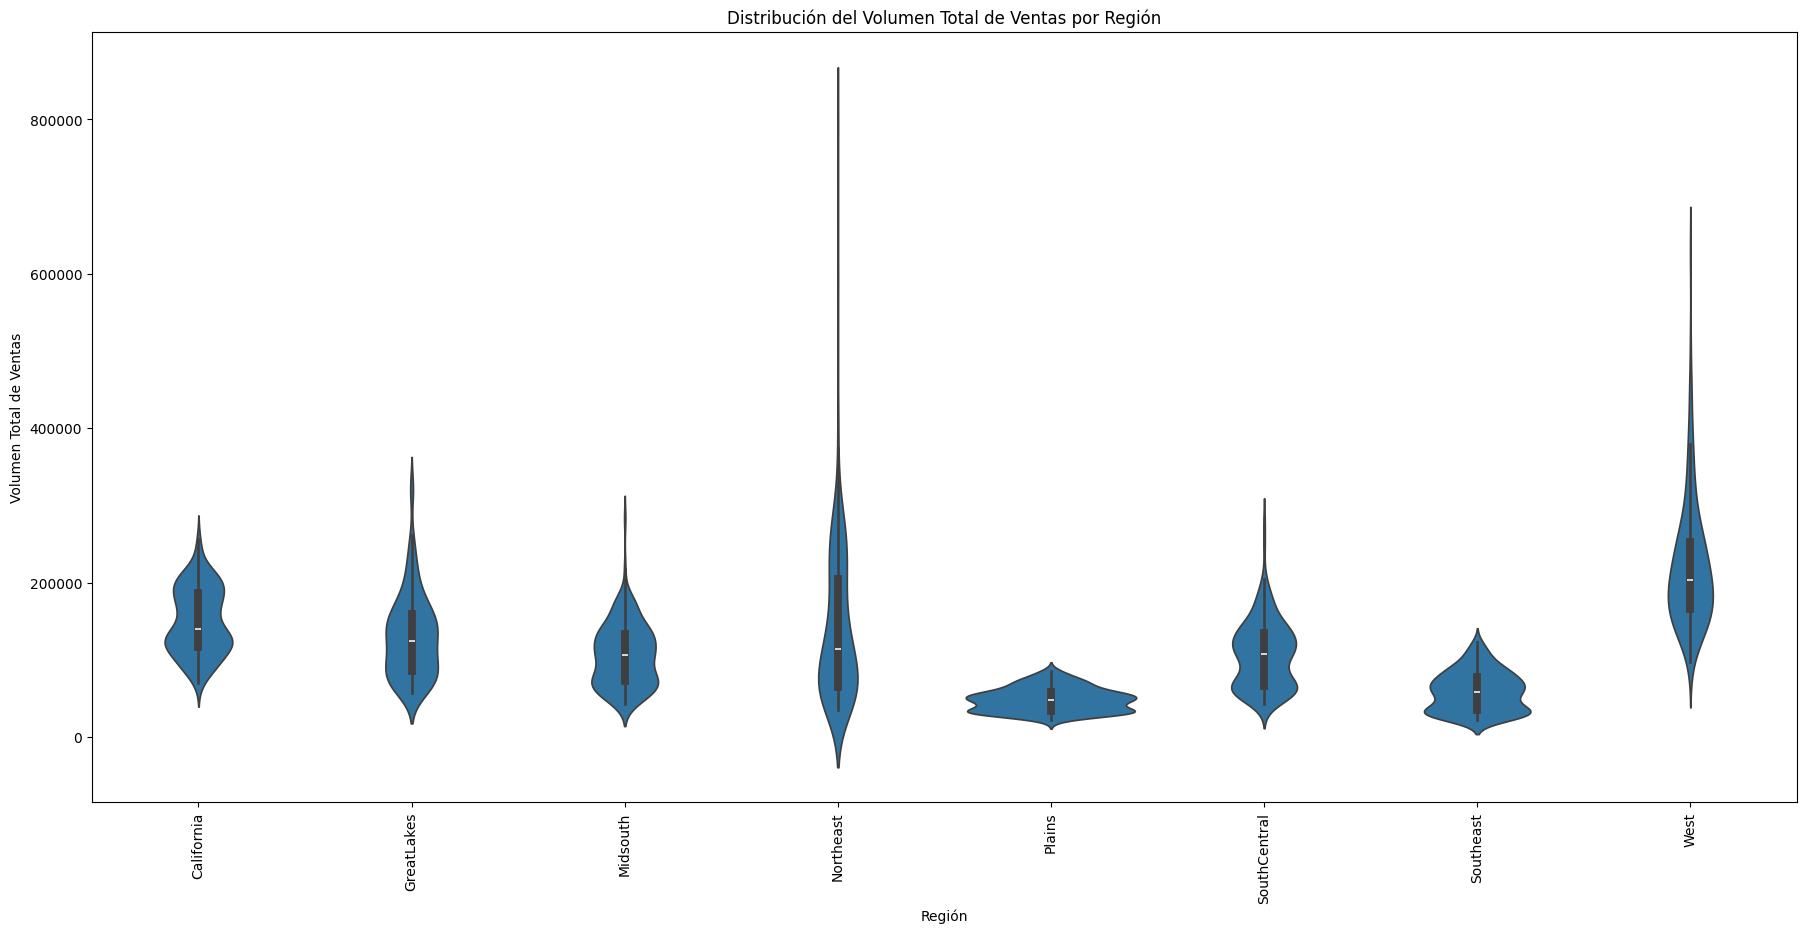

In [65]:
#Vamos a hacer lo mismo pero ahora solo contemplando los aguacates orgánicos

organic_greater_regions = greater_regions[greater_regions['type'] == 'organic']
plt.figure(figsize=(22, 10))  
# Configura el tamaño del gráfico para mejor visibilidad  

# Crear el gráfico de violín para las GreaterRegions 

sns.violinplot(x='region', y='Total Volume', data=organic_greater_regions)  
# Configurar el título y las etiquetas 
plt.title('Distribución del Volumen Total de Ventas por Región') 
plt.xlabel('Región') 
plt.ylabel('Volumen Total de Ventas')  
# Mostrar el gráfico 
plt.xticks(rotation=90)  # Rota las etiquetas del eje x si son muchas o largas 
plt.show()

Vemos que ahora los violines no tienen dos partes tan diferenciadas como en el caso anterior donde considerabamos ambos tipos a la vez. 
Podríamos considerar la hipótesis que las dos partes de cada violín corresponden al comportamiento de las ventas para los convencionales y los orgánicos.

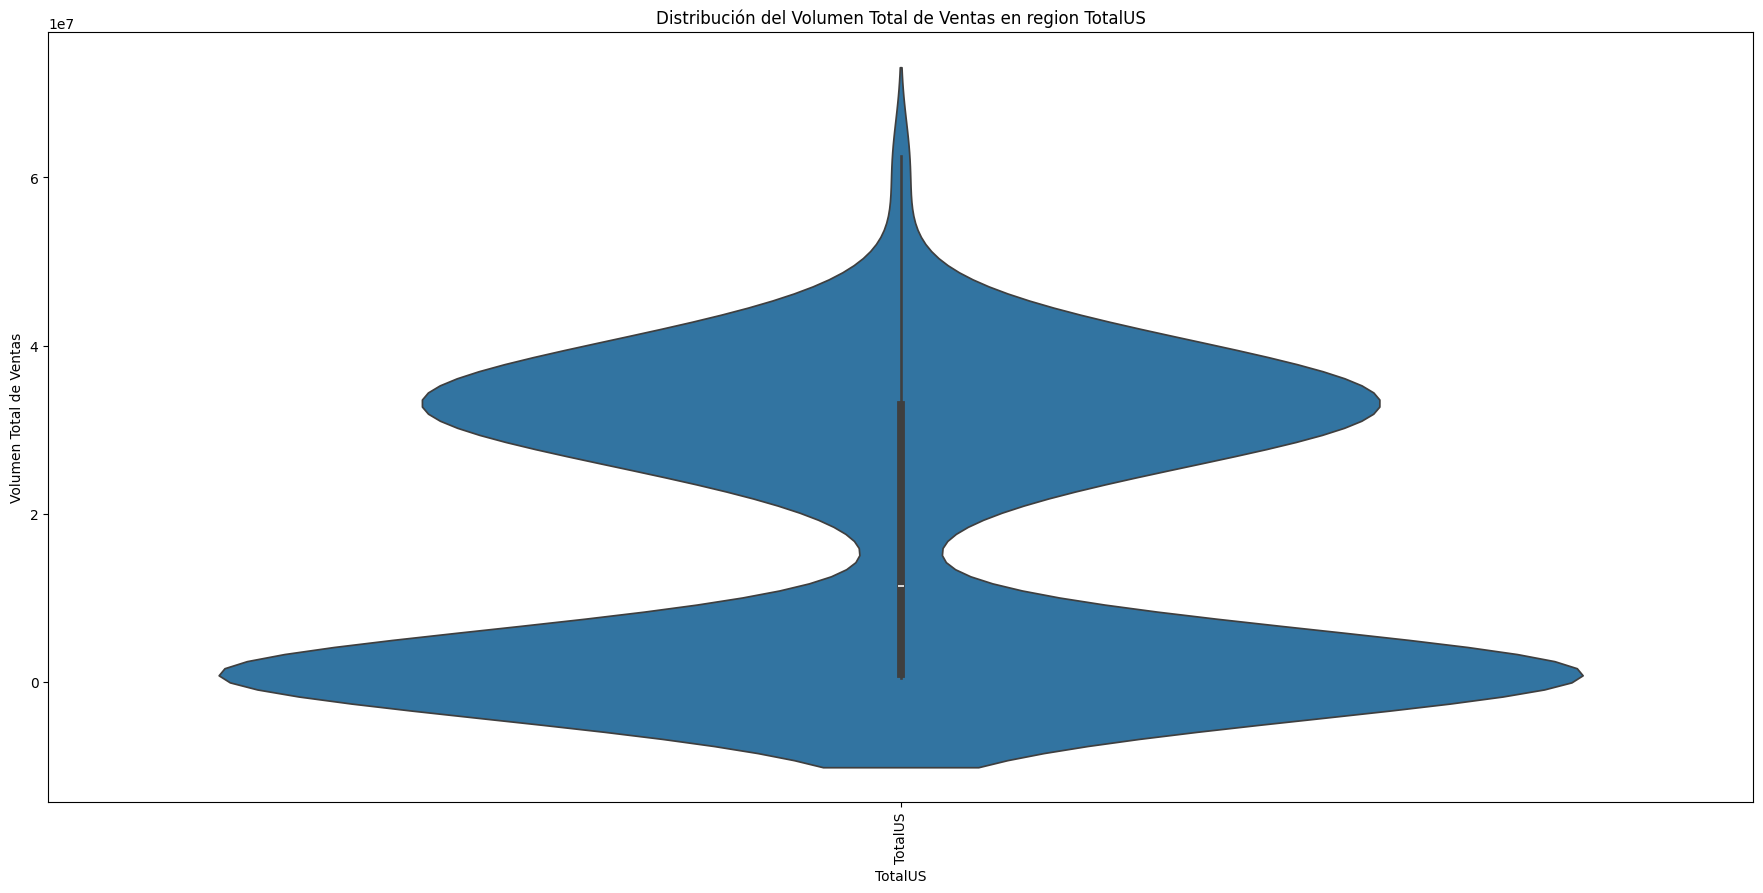

In [27]:
plt.figure(figsize=(22, 10))  
# Configura el tamaño del gráfico para mejor visibilidad  

# Crear el gráfico de violín para TotalUS

sns.violinplot(x='region', y='Total Volume', data=df[df['region']=='TotalUS'])  
# Configurar el título y las etiquetas 
plt.title('Distribución del Volumen Total de Ventas en region TotalUS') 
plt.xlabel('TotalUS') 
plt.ylabel('Volumen Total de Ventas')  
# Mostrar el gráfico 
plt.xticks(rotation=90)  # Rota las etiquetas del eje x si son muchas o largas 
plt.show()

In [30]:
NO_greater_regions = df[df['cat_region']!='GreaterRegion']
# Eliminar la fila que contiene 'TotalUS'
NO_greater_regions = NO_greater_regions[NO_greater_regions['region'] != 'TotalUS']

<Figure size 5000x80000 with 0 Axes>

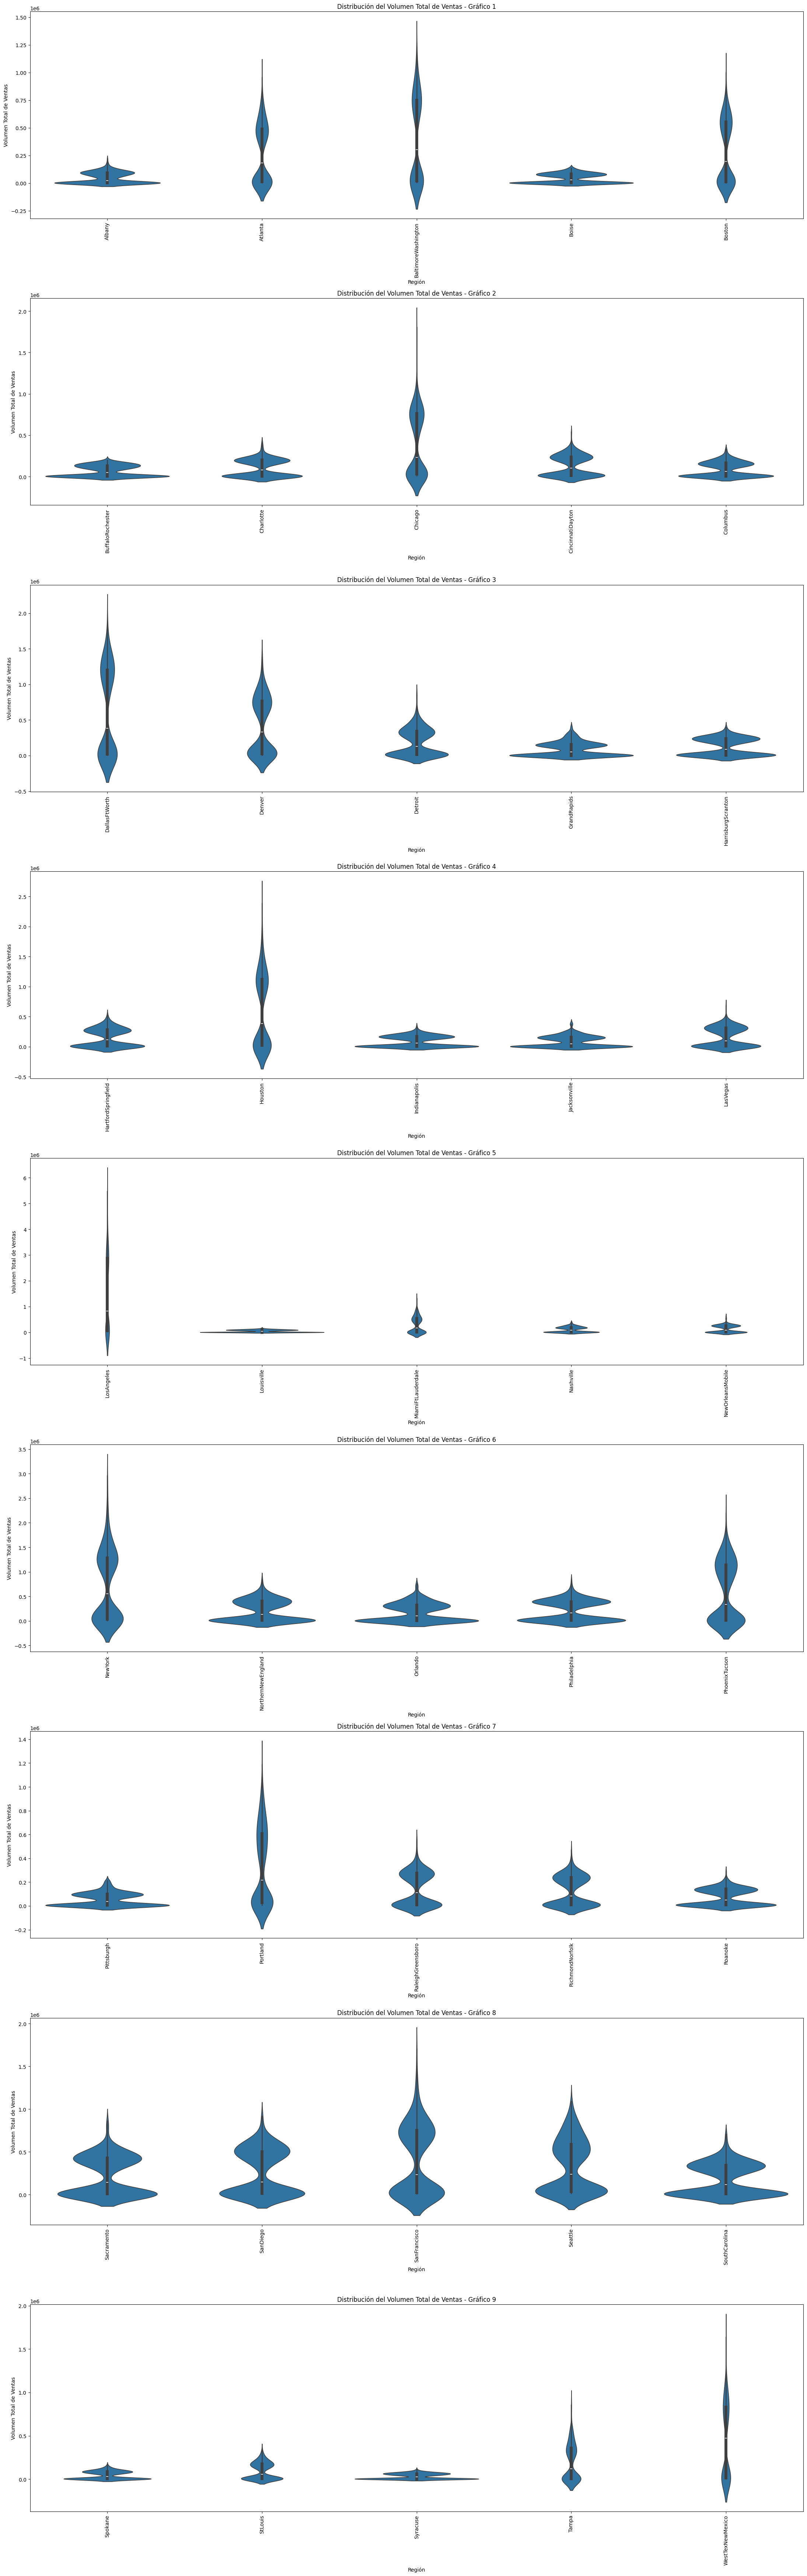

In [48]:
plt.figure(figsize=(50, 800))  
# Configura el tamaño del gráfico para mejor visibilidad  

# Crear el gráfico de violín para las demás regiones (No TotalUS ni tampoco GreaterRegions)

# Crear un gráfico para cada grupo de cinco regiones
num_regions = len(NO_greater_regions)
num_plots = 9  # Número de gráficos que deseas crear
regions_per_plot = 5  # Número de regiones por gráfico

# Configurar la figura
fig, axes = plt.subplots(num_plots, 1, figsize=(22, 70))  # Crear 2 filas y 1 columna

for i in range(num_plots):
    # Seleccionar las regiones para el gráfico actual
    start = i * regions_per_plot
    end = start + regions_per_plot
    current_regions = NO_greater_regions['region'].unique()[start:end]

    # Filtrar el DataFrame para las regiones actuales
    filtered_df = NO_greater_regions[NO_greater_regions['region'].isin(current_regions)]

    # Crear el gráfico de violín
    sns.violinplot(x='region', y='Total Volume', data=filtered_df, ax=axes[i])
    axes[i].set_title(f'Distribución del Volumen Total de Ventas - Gráfico {i + 1}')
    axes[i].set_xlabel('Región')
    axes[i].set_ylabel('Volumen Total de Ventas')
    axes[i].tick_params(axis='x', rotation=90)  # Rotar etiquetas del eje x

# Ajustar el layout
plt.tight_layout()
plt.show()

In [5]:
grouped_data = df[['region', 'Total Volume']].groupby('region').sum().reset_index()
grouped_data

,region,Total Volume
0,Albany,1.606780e+07
1,Atlanta,8.860512e+07
2,BaltimoreWashington,1.347139e+08
3,Boise,1.441319e+07
4,Boston,9.727398e+07
5,BuffaloRochester,2.296247e+07
6,California,1.028982e+09
7,Charlotte,3.555554e+07
8,Chicago,1.337023e+08
9,CincinnatiDayton,4.452201e+07


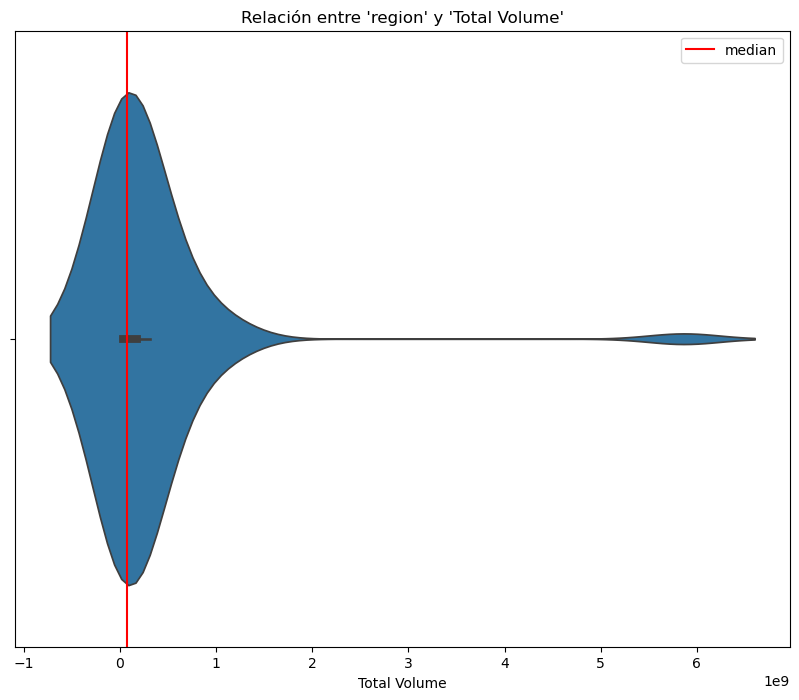

In [28]:
# Create a violin plot for the 'Total Volume' column
plt.figure(figsize=(10, 8))
violin = sns.violinplot(x=grouped_data['Total Volume'])
#violin = sns.violinplot(x=grouped_data['Total Volume'], y=grouped_data.region)
plt.title('Relación entre \'region\' y \'Total Volume\'')
plt.xlabel('Total Volume')

# Add a vertical line at the median volume
violin.axvline(x=grouped_data['Total Volume'].median(), c="red", label="median")

# Add a legend to the plot to label the red line as 'median'
plt.legend()

In [61]:
# The DataFrame contains cities and TotalUS
# Filter out rows that are not proper US REGIONS
# Ref. https://michaelminn.net/tutorials/regions-usa/
df1 = df[['region', 'Total Volume']]
#df1 = df1[df1['region']!='TotalUS']
df1 = df1[df1['region'].isin(lst_regions)]
gd1 = df1.groupby('region').sum().reset_index()
gd1

,region,Total Volume
0,GreatLakes,5.896425e+08
1,Midsouth,5.083494e+08
2,Northeast,7.132809e+08
3,Plains,3.111885e+08
4,SouthCentral,1.011280e+09
5,Southeast,6.152384e+08
6,West,1.086779e+09


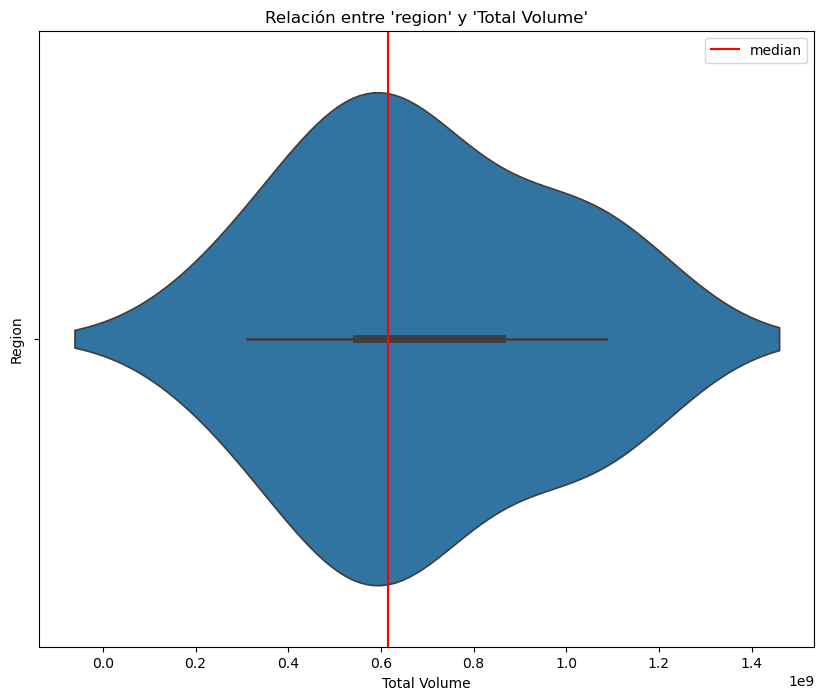

In [66]:
# Create a violin plot for the 'Total Volume' column
plt.figure(figsize=(10, 8))
violin = sns.violinplot(x=gd1['Total Volume'])
#violin = sns.violinplot(x=grouped_data['Total Volume'], y=grouped_data.region)
plt.title('Relación entre \'region\' y \'Total Volume\'')
plt.xlabel('Total Volume')
plt.ylabel('Region')

# Add a vertical line at the median volume
violin.axvline(x=gd1['Total Volume'].median(), c="red", label="median")

# Add a legend to the plot to label the red line as 'median'
plt.legend()

2. **Boxplot Comparativo de Precios entre Años:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `year`.
   - **Esperado:** Genera boxplots para comparar la distribución de precios.
     - Utiliza `boxplot` de `seaborn` para crear boxplots que comparen `AveragePrice` entre diferentes años.
     - Asegúrate de que cada boxplot represente un año diferente.
     - Incluye etiquetas y títulos descriptivos usando `plt.title()`.

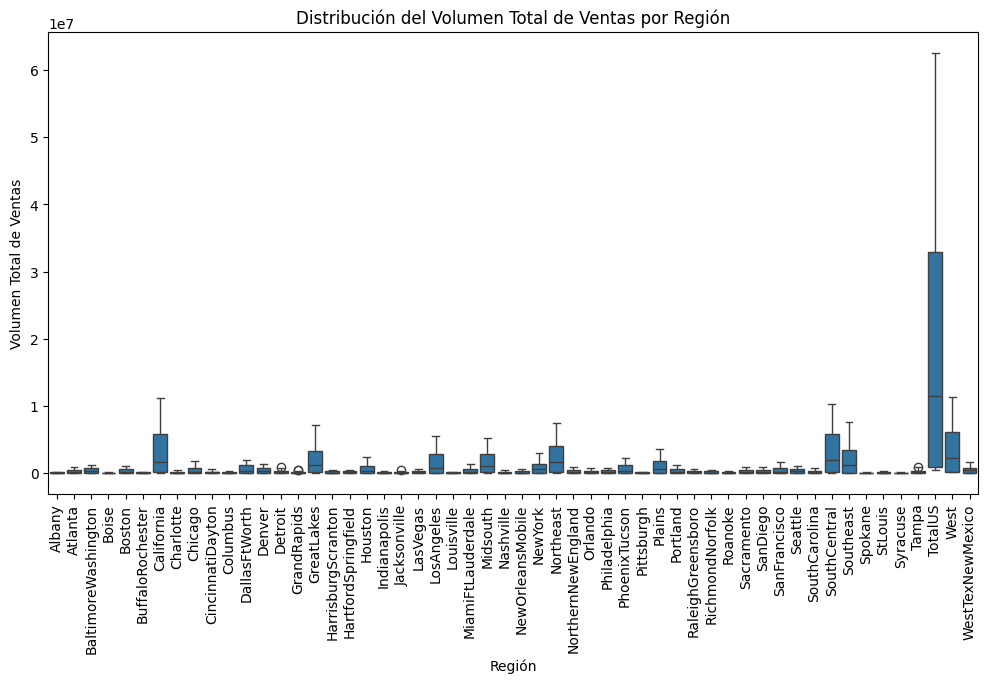

In [8]:
plt.figure(figsize=(12, 6))  # Tamaño del gráfico para mayor claridad  
# Crear el boxplot 
sns.boxplot(x='region', y='Total Volume', data=df)  
# Personalizar etiquetas y título 
plt.title('Distribución del Volumen Total de Ventas por Región') 
plt.xlabel('Región') 
plt.ylabel('Volumen Total de Ventas')  
plt.xticks(rotation=90)  # Rota etiquetas del eje x si son largas 
plt.show()

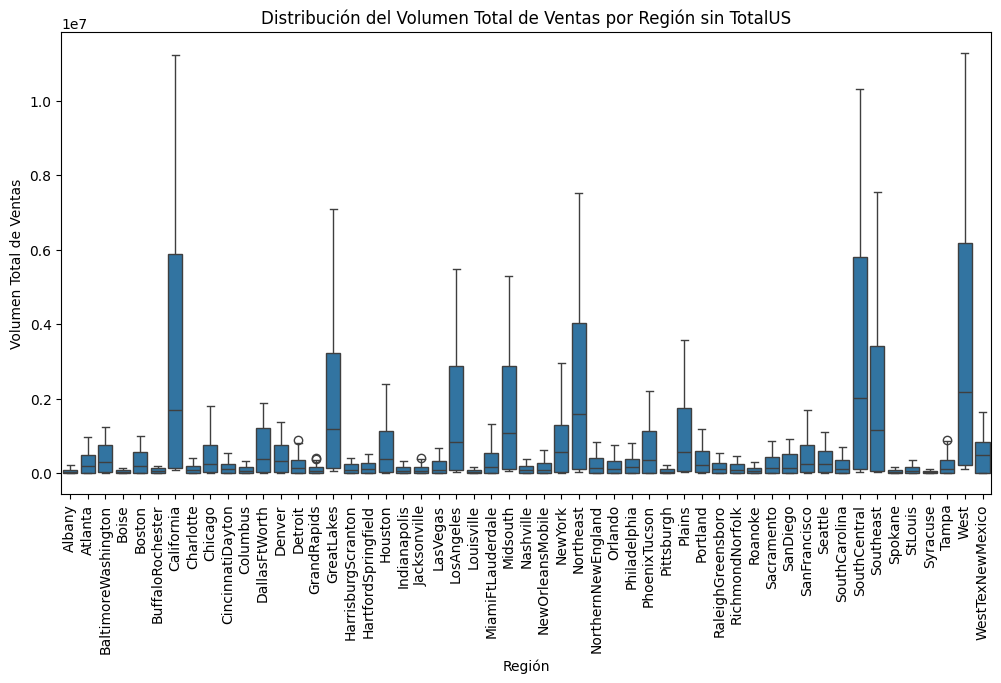

In [51]:
#Vamos a hacer lo mismo sin el TotalUS
sin_TotalUS=df[df['region']!='TotalUS']

plt.figure(figsize=(12, 6))  # Tamaño del gráfico para mayor claridad  
# Crear el boxplot 
sns.boxplot(x='region', y='Total Volume', data=sin_TotalUS)  
# Personalizar etiquetas y título 
plt.title('Distribución del Volumen Total de Ventas por Región sin TotalUS') 
plt.xlabel('Región') 
plt.ylabel('Volumen Total de Ventas')  
plt.xticks(rotation=90)  # Rota etiquetas del eje x si son largas 
plt.show()

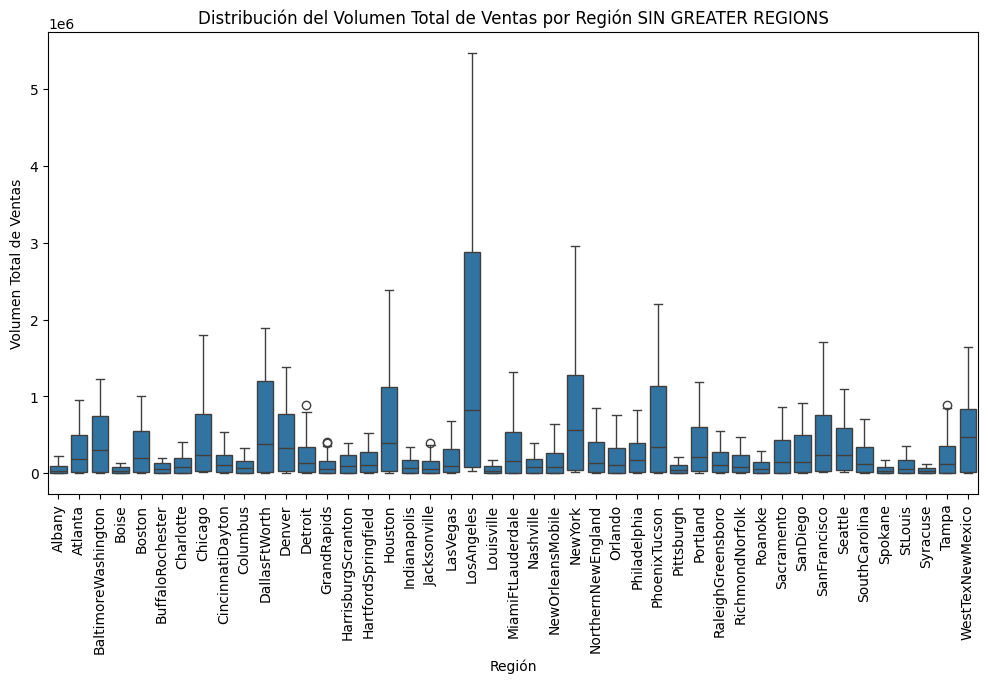

In [52]:
#Lo mismo pero sin las GreaterRegions
plt.figure(figsize=(12, 6))  # Tamaño del gráfico para mayor claridad  
# Crear el boxplot 
sns.boxplot(x='region', y='Total Volume', data=NO_greater_regions)  
# Personalizar etiquetas y título 
plt.title('Distribución del Volumen Total de Ventas por Región SIN GREATER REGIONS') 
plt.xlabel('Región') 
plt.ylabel('Volumen Total de Ventas')  
plt.xticks(rotation=90)  # Rota etiquetas del eje x si son largas 
plt.show()

In [ ]:
#Lo mismo pero solo las GreaterRegions
plt.figure(figsize=(12, 6))  # Tamaño del gráfico para mayor claridad  
# Crear el boxplot 
sns.boxplot(x='region', y='Total Volume', data=NO_greater_regions)  
# Personalizar etiquetas y título 
plt.title('Distribución del Volumen Total de Ventas por Región SIN GREATER REGIONS') 
plt.xlabel('Región') 
plt.ylabel('Volumen Total de Ventas')  
plt.xticks(rotation=90)  # Rota etiquetas del eje x si son largas 
plt.show()

3. **Histograma de Volumen Total de Ventas:**
   - **Uso de Datos:** Usa la columna `Total Volume`.
   - **Esperado:** Crea un histograma para mostrar la distribución del volumen total de ventas.
     - Utiliza `hist()` de `matplotlib` para crear el histograma.
     - Ajusta el número de bins para una visualización clara usando el parámetro `bins`.
     - Añade etiquetas y un título que describa lo que se muestra.

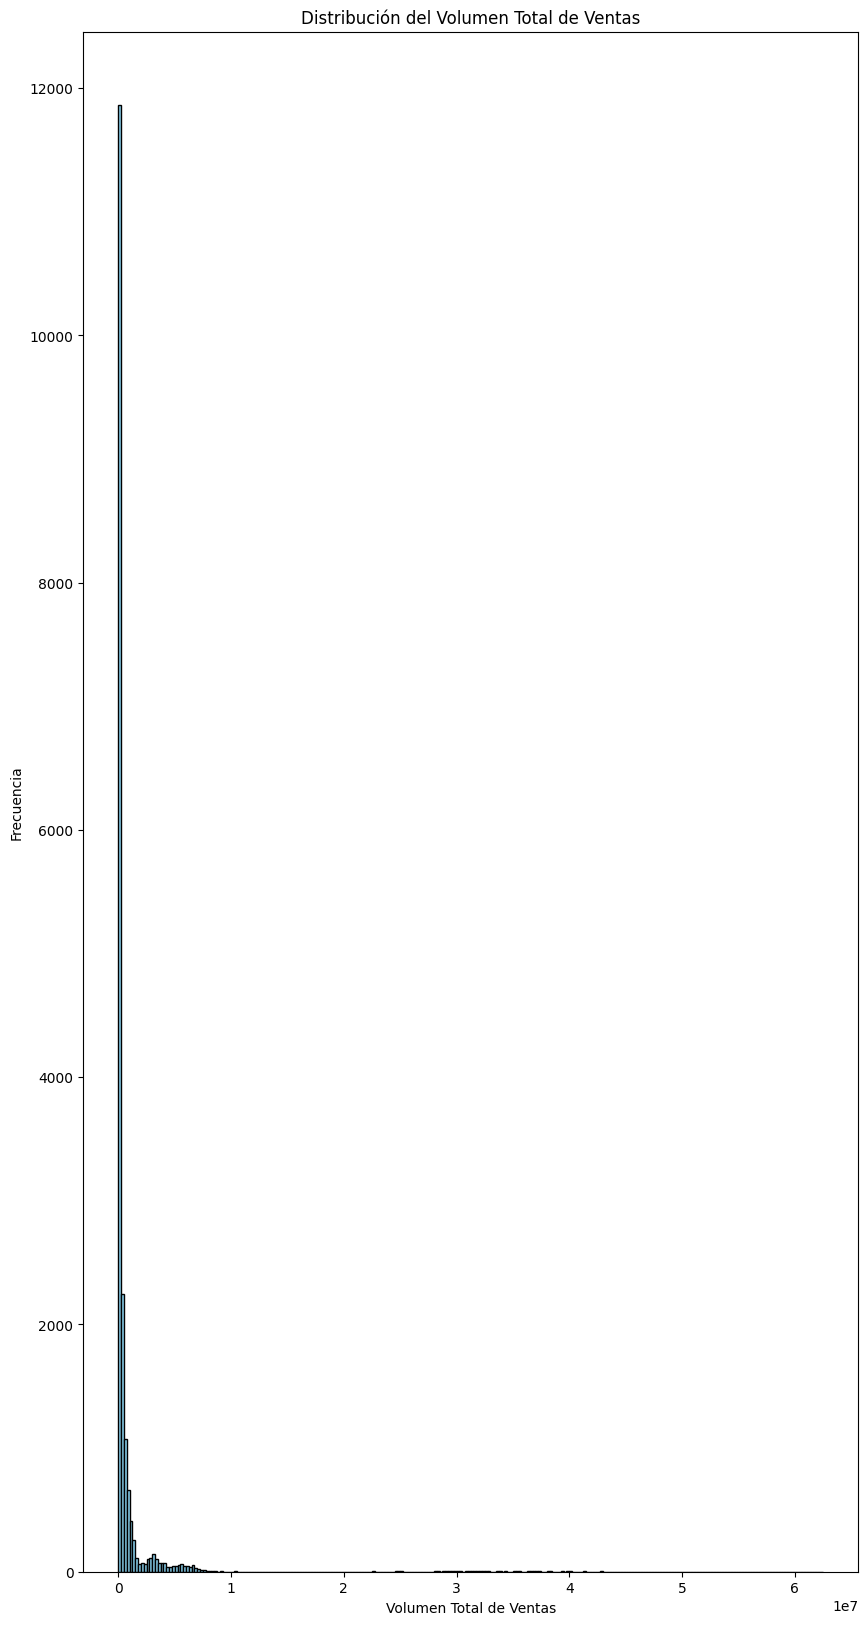

In [9]:
plt.figure(figsize=(10, 20))  
# Crear el histograma 
plt.hist(df['Total Volume'], bins=250, color='skyblue', edgecolor='black')  
# Personalizar etiquetas y título 
plt.title('Distribución del Volumen Total de Ventas') 
plt.xlabel('Volumen Total de Ventas') 
plt.ylabel('Frecuencia')  
plt.show()

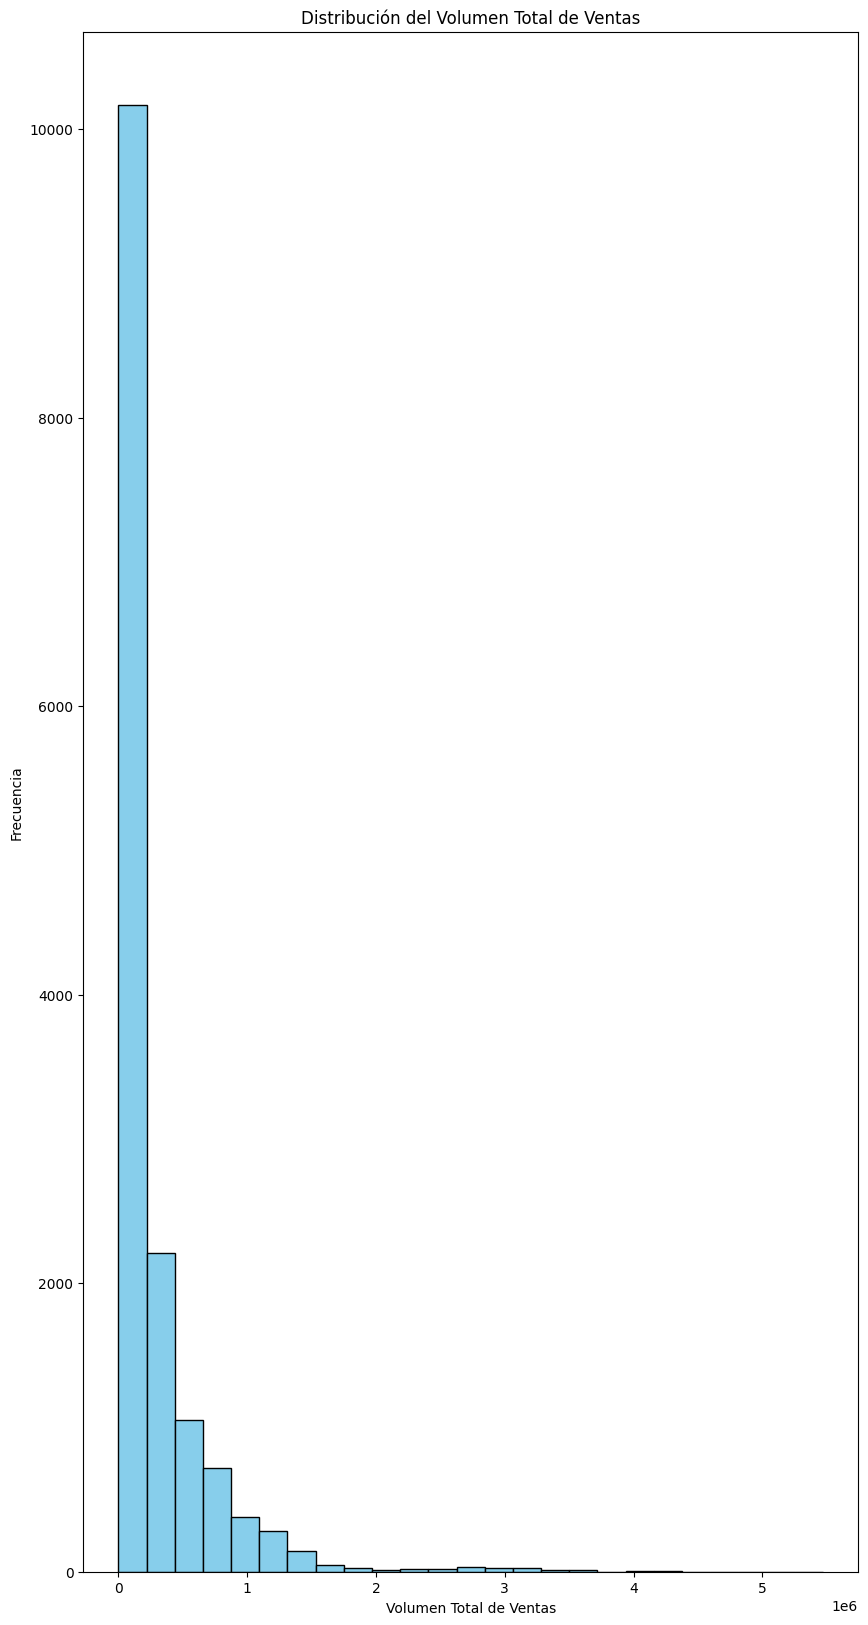

In [53]:
#Vamos a hacer lo mismo sin totalus ni greater regions
plt.figure(figsize=(10, 20))  
# Crear el histograma 
plt.hist(NO_greater_regions['Total Volume'], bins=25, color='skyblue', edgecolor='black')  
# Personalizar etiquetas y título 
plt.title('Distribución del Volumen Total de Ventas') 
plt.xlabel('Volumen Total de Ventas') 
plt.ylabel('Frecuencia')  
plt.show()

4. **Gráfico de Barras de Ventas por Tipo de Bolsa:**
   - **Uso de Datos:** Utiliza las columnas `Total Bags`, `Small Bags`, `Large Bags` y `XLarge Bags`.
   - **Esperado:** Compara las ventas de diferentes tipos de bolsas.
     - Suma los volúmenes de ventas por tipo de bolsa utilizando `sum()`.
     - Crea un gráfico de barras con `plt.bar()` para mostrar las diferencias en ventas.
     - Asegúrate de incluir etiquetas para cada tipo de bolsa.

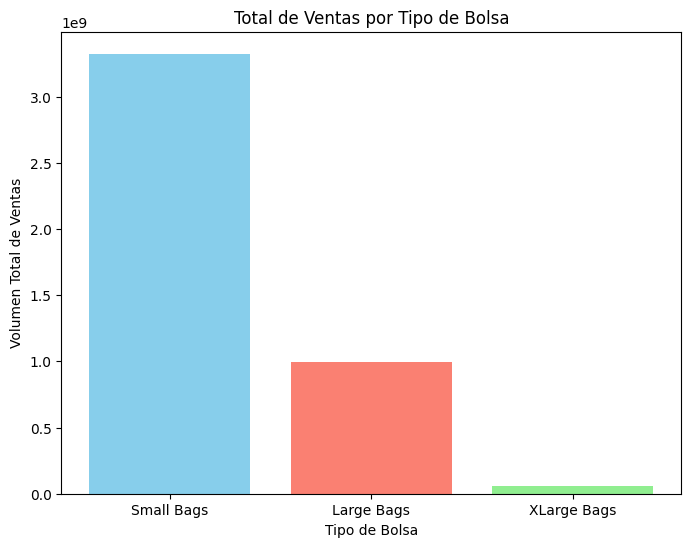

In [68]:
bolsas=df[['Small Bags', 'Large Bags', 'XLarge Bags']].sum() 
plt.figure(figsize=(8, 6)) 
plt.bar(bolsas.index, bolsas.values, color=['skyblue', 'salmon', 'lightgreen'])  
# Añadir etiquetas y título 
plt.title('Total de Ventas por Tipo de Bolsa') 
plt.xlabel('Tipo de Bolsa') 
plt.ylabel('Volumen Total de Ventas')  
# Mostrar el gráfico 
plt.show()

5. **Gráfico de Líneas de Precios Promedios por Año:**
   - **Uso de Datos:** Utiliza las columnas `AveragePrice` y `year`.
   - **Esperado:** Visualiza la tendencia de precios promedio a lo largo de los años.
     - Agrupa los datos por `year` y calcula el promedio de `AveragePrice`.
     - Usa `plt.plot()` para crear un gráfico de líneas que muestre la evolución de precios.
     - Añade un título y etiquetas descriptivas a los ejes usando `plt.title()` y `plt.xlabel()`.

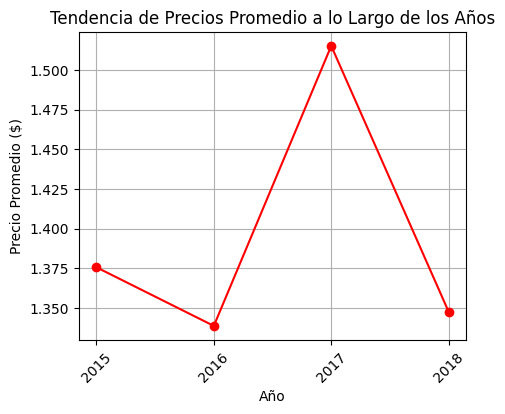

In [56]:
group_year1 = df.groupby('year')['AveragePrice'].mean().reset_index()

# Crear el gráfico de líneas
plt.figure(figsize=(5, 4))  # Tamaño del gráfico
plt.plot(group_year1['year'], group_year1['AveragePrice'], marker='o', linestyle='-', color='r')

# Añadir título y etiquetas
plt.title('Tendencia de Precios Promedio a lo Largo de los Años')
plt.xlabel('Año')
plt.ylabel('Precio Promedio ($)')

plt.xticks(group_year1['year'], rotation=45) 
# Mostrar la cuadrícula para mejor legibilidad
plt.grid()

# Mostrar el gráfico
plt.show()


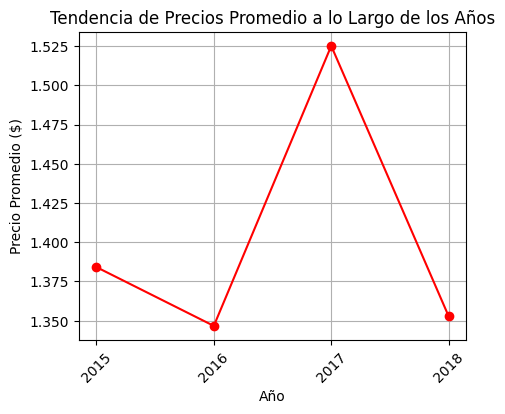

In [57]:
#Vamos a hacer lo mismo para TotalUS, Greater Regions, y finalmente las demás sin el total ni los greater_regions
group_year2 = NO_greater_regions.groupby('year')['AveragePrice'].mean().reset_index()

# Crear el gráfico de líneas
plt.figure(figsize=(5, 4))  # Tamaño del gráfico
plt.plot(group_year2['year'], group_year2['AveragePrice'], marker='o', linestyle='-', color='r')

# Añadir título y etiquetas
plt.title('Tendencia de Precios Promedio a lo Largo de los Años')
plt.xlabel('Año')
plt.ylabel('Precio Promedio ($)')

plt.xticks(group_year2['year'], rotation=45) 
# Mostrar la cuadrícula para mejor legibilidad
plt.grid()

# Mostrar el gráfico
plt.show()

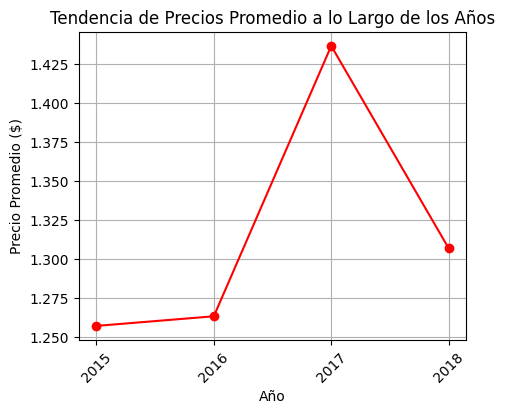

In [72]:
group_year3 = df[df['region']=='TotalUS'].groupby('year')['AveragePrice'].mean().reset_index()

# Crear el gráfico de líneas
plt.figure(figsize=(5, 4))  # Tamaño del gráfico
plt.plot(group_year3['year'], group_year3['AveragePrice'], marker='o', linestyle='-', color='r')

# Añadir título y etiquetas
plt.title('Tendencia de Precios Promedio a lo Largo de los Años')
plt.xlabel('Año')
plt.ylabel('Precio Promedio ($)')

plt.xticks(group_year3['year'], rotation=45) 
# Mostrar la cuadrícula para mejor legibilidad
plt.grid()

# Mostrar el gráfico
plt.show()

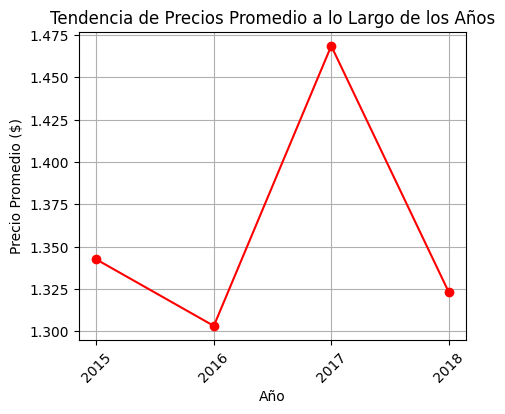

In [71]:
#Hagamoslo solo para las greater_regions
group_year4 = greater_regions.groupby('year')['AveragePrice'].mean().reset_index()

# Crear el gráfico de líneas
plt.figure(figsize=(5, 4))  # Tamaño del gráfico
plt.plot(group_year4['year'], group_year4['AveragePrice'], marker='o', linestyle='-', color='r')

# Añadir título y etiquetas
plt.title('Tendencia de Precios Promedio a lo Largo de los Años')
plt.xlabel('Año')
plt.ylabel('Precio Promedio ($)')

plt.xticks(group_year3['year'], rotation=45) 
# Mostrar la cuadrícula para mejor legibilidad
plt.grid()

# Mostrar el gráfico
plt.show()

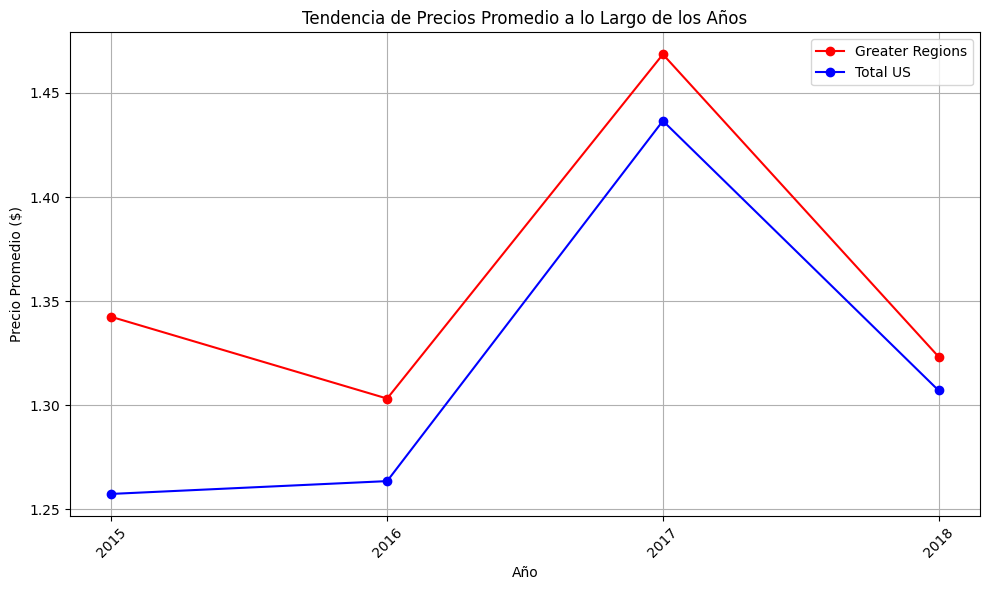

In [73]:
# Crear el gráfico de líneas para ambas graficas anteriores
plt.figure(figsize=(10, 6))  # Tamaño del gráfico

# Dibujar la línea para greater_regions
plt.plot(group_year4['year'], group_year4['AveragePrice'], marker='o', linestyle='-', color='r', label='Greater Regions')

# Dibujar la línea para TotalUS
plt.plot(group_year3['year'], group_year3['AveragePrice'], marker='o', linestyle='-', color='b', label='Total US')

# Añadir título y etiquetas
plt.title('Tendencia de Precios Promedio a lo Largo de los Años')
plt.xlabel('Año')
plt.ylabel('Precio Promedio ($)')

# Configurar los ticks del eje x
plt.xticks(group_year3['year'], rotation=45) 

# Mostrar la cuadrícula para mejor legibilidad
plt.grid()

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el layout
plt.show()